In [1]:
from PIL import Image, ImageDraw, ImageFont,ImageOps
import numpy as np
import glob
import pandas as pd

In [2]:
# 画像を読み込み、グレースケールに変換
image_path = '../data/20240927222640.jpg'
rgb_image = Image.open(image_path)
image = Image.open(image_path).convert('L')

# 画像をnumpy配列に変換
image_array = np.array(image)

# ピクセル値は黒0、白255

In [3]:
# 画像サイズの確認
originai_image_height,original_image_width = image_array.shape
print(originai_image_height,original_image_width)

885 613


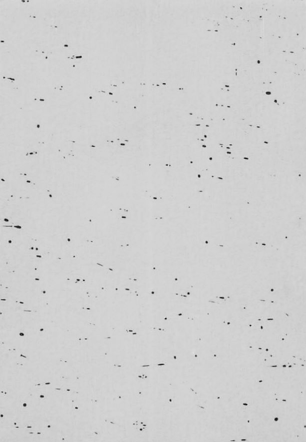

濃いピクセルの割合:しきい値100 0.32%


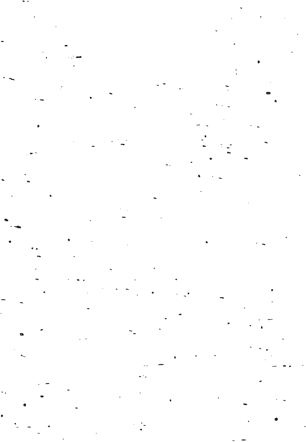

濃いピクセルの割合:しきい値125 0.46%


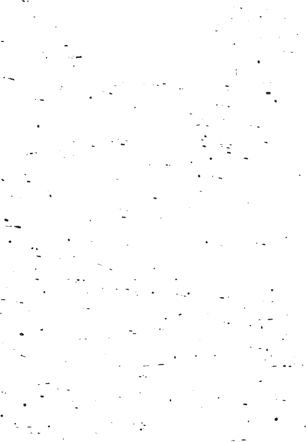

濃いピクセルの割合:しきい値150 0.66%


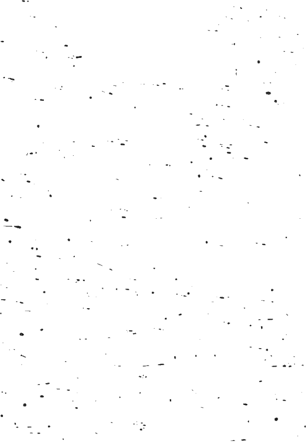

濃いピクセルの割合:しきい値175 0.94%


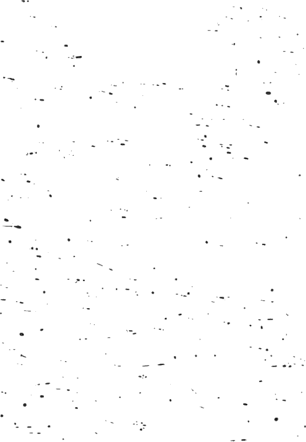

濃いピクセルの割合:しきい値200 2.09%


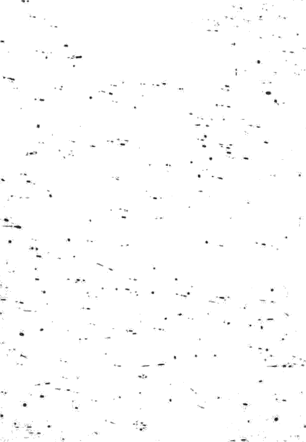

In [4]:
# 縮小して表示
resize_percent = 0.5

# オリジナル画像の表示
new_height = int(originai_image_height * resize_percent)
new_width = int(original_image_width * resize_percent)

# サイズを変更
resized_original_image = image.resize((new_width, new_height))
resized_original_image.show()

# しきい値を設定（しきい値の違いを比較）
threshold_array =[100,125,150,175,200]

resized_images = {} 

for idx,threshold in enumerate(threshold_array):

    # 新しい画像を作成し、しきい値以下のピクセルのみを残し、他は255（白）に設定
    threshold_image_array = np.where(image_array <= threshold, image_array, 255)
    # numpy配列を画像に戻す
    threshold_image = Image.fromarray(threshold_image_array)

    dark_pixels = np.sum(threshold_image_array <= threshold)
    # 全体のピクセル数を取得
    total_pixels = threshold_image_array.size
    # 濃いピクセルの割合を計算
    dark_pixel_ratio = dark_pixels / total_pixels
    print(f'濃いピクセルの割合:しきい値{threshold} {dark_pixel_ratio:.2%}')

    image_width,image_height = threshold_image.size

    # 新しいサイズをパーセンテージに基づいて計算
    new_width = int(image_width * resize_percent)
    new_height = int(image_height * resize_percent)

    # サイズを変更して辞書に保存
    resized_images[f'resized_image_{idx}'] = threshold_image.resize((new_width, new_height))

    # 画像を表示
    resized_images[f'resized_image_{idx}'].show()


In [5]:
# オリジナルimageの各ピクセル値の出現数をカウント
pixel_counts = np.bincount(image_array.flatten(), minlength=256)

# 結果を表示
for value, count in enumerate(pixel_counts):
    # ピクセル値0は除外
    if count != 0:
        print(f'ピクセル値 {value}: {count}個')

ピクセル値 5: 1個
ピクセル値 8: 2個
ピクセル値 9: 4個
ピクセル値 10: 5個
ピクセル値 11: 4個
ピクセル値 12: 15個
ピクセル値 13: 5個
ピクセル値 14: 6個
ピクセル値 15: 16個
ピクセル値 16: 12個
ピクセル値 17: 16個
ピクセル値 18: 20個
ピクセル値 19: 19個
ピクセル値 20: 21個
ピクセル値 21: 18個
ピクセル値 22: 16個
ピクセル値 23: 15個
ピクセル値 24: 25個
ピクセル値 25: 14個
ピクセル値 26: 20個
ピクセル値 27: 20個
ピクセル値 28: 22個
ピクセル値 29: 25個
ピクセル値 30: 15個
ピクセル値 31: 25個
ピクセル値 32: 20個
ピクセル値 33: 14個
ピクセル値 34: 20個
ピクセル値 35: 21個
ピクセル値 36: 18個
ピクセル値 37: 22個
ピクセル値 38: 17個
ピクセル値 39: 15個
ピクセル値 40: 18個
ピクセル値 41: 20個
ピクセル値 42: 23個
ピクセル値 43: 19個
ピクセル値 44: 26個
ピクセル値 45: 24個
ピクセル値 46: 17個
ピクセル値 47: 29個
ピクセル値 48: 16個
ピクセル値 49: 16個
ピクセル値 50: 25個
ピクセル値 51: 24個
ピクセル値 52: 15個
ピクセル値 53: 19個
ピクセル値 54: 17個
ピクセル値 55: 13個
ピクセル値 56: 15個
ピクセル値 57: 18個
ピクセル値 58: 25個
ピクセル値 59: 24個
ピクセル値 60: 17個
ピクセル値 61: 21個
ピクセル値 62: 16個
ピクセル値 63: 12個
ピクセル値 64: 24個
ピクセル値 65: 20個
ピクセル値 66: 16個
ピクセル値 67: 17個
ピクセル値 68: 16個
ピクセル値 69: 20個
ピクセル値 70: 23個
ピクセル値 71: 11個
ピクセル値 72: 22個
ピクセル値 73: 20個
ピクセル値 74: 17個
ピクセル値 75: 14個
ピクセル値 76: 15個
ピクセル値 77: 22個
ピクセル値 78: 15個
ピク

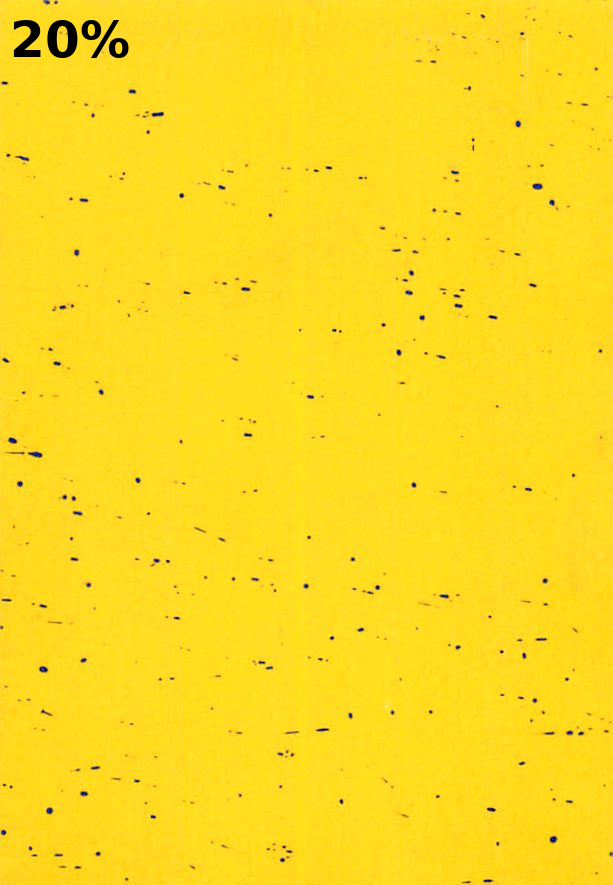

In [6]:
# オリジナルimageにテキストを入れ込み保存

# ImageDrawオブジェクトを作成
draw = ImageDraw.Draw(rgb_image)

# フォントの設定（システムのデフォルトフォントを使用）
font = ImageFont.load_default()

# フォントサイズを指定します（例: 40）
font = ImageFont.truetype("DejaVuSans-Bold.ttf", 50) 

# テキストを追加する位置（x, y）を指定
position = (10, 10)

# 描画するテキスト
text = "20%"

# テキストの色（黒）
text_color = 0  

# 画像にテキストを描画
draw.text(position, text, fill=text_color, font=font)

rgb_image

In [7]:
# 加工したimageの保存
output_path = '../data/new_sample.jpeg'
rgb_image.save(output_path)

In [8]:
# ディレクトリのパスを指定
directory_path = '../data'

# 指定されたディレクトリ内のすべてのファイルリストを取得
files = glob.glob(f'{directory_path}/*.jpg')

files.sort()
# ファイルリストを表示
print(files)

['../data/20240927215850.jpg', '../data/20240927215851_000.jpg', '../data/20240927215851_001.jpg', '../data/20240927215852.jpg', '../data/20240927215853.jpg', '../data/20240927215854.jpg', '../data/20240927215855_000.jpg', '../data/20240927215855_001.jpg', '../data/20240927215856.jpg', '../data/20240927215857.jpg', '../data/20240927215858_000.jpg', '../data/20240927215858_001.jpg', '../data/20240927215859.jpg', '../data/20240927220011.jpg', '../data/20240927220012.jpg', '../data/20240927220013_000.jpg', '../data/20240927220013_001.jpg', '../data/20240927220014.jpg', '../data/20240927220015.jpg', '../data/20240927220016.jpg', '../data/20240927220017_000.jpg', '../data/20240927220017_001.jpg', '../data/20240927220018.jpg', '../data/20240927220019.jpg', '../data/20240927220020.jpg', '../data/20240927220021.jpg', '../data/20240927220132_000.jpg', '../data/20240927220132_001.jpg', '../data/20240927220133.jpg', '../data/20240927220134.jpg', '../data/20240927220135.jpg', '../data/202409272201

In [9]:
def add_border_and_padding(image, border_size=5, padding_size=10):
    # 白い余白を追加
    image_with_padding = ImageOps.expand(image, border=padding_size, fill=(255, 255, 255))
    
    return image_with_padding

In [10]:
image_list = []

# imageを結合して保存
for file_path in files:
    image = add_border_and_padding(Image.open(file_path))
    image_list.append(image)


widths, heights = zip(*(img.size for img in image_list))
# 結合後の画像の幅と高さを計算
total_width = sum(widths)
max_height = max(heights)

print(total_width,max_height)

# 新しい画像を作成（RGBモードで白背景）
new_image = Image.new('RGB', (total_width, max_height), (255, 255, 255))

# 各画像を新しい画像に貼り付け
x_offset = 0
for img in image_list:
    new_image.paste(img, (x_offset, 0))
    x_offset += img.width

# 結合した画像を表示
new_image.show()

259065 941


In [11]:
path = '../data/imageinfo.csv'
df = pd.read_csv(path)
df

,name,value
0,img1,NaN
1,img2,NaN
2,img3,NaN
3,img4,NaN
4,img5,NaN
5,img6,NaN
6,img7,NaN


In [12]:
df['value'].iloc[0]= dark_pixel_ratio
df

/tmp/ipykernel_2188/2660744495.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['value'].iloc[0]= dark_pixel_ratio
/tmp/ipykernel_2188/2660744495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,name,value
0,img1,0.161545
1,img2,NaN
2,img3,NaN
3,img4,NaN
4,img5,NaN
5,img6,NaN
6,img7,NaN


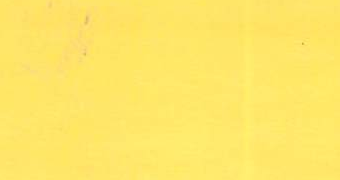

In [13]:
# 画像の切り取り
im_crop = image.crop((60, 20, 400, 200))
im_crop

In [14]:
def crop_center(pil_img, crop_area):
    img_width, img_height = pil_img.size
    crop_width = int(img_width * (1-crop_area))
    crop_height = int(img_height * (1-crop_area))
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

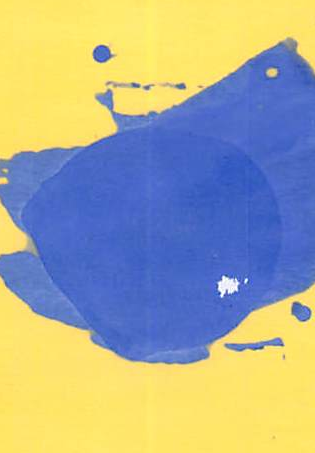

In [15]:
croped_img = crop_center(image,0.5)
croped_img